<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/01_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Data Processing</h1>

In this notebook, we will cover the topic of data processing which includes exploring and cleaning datasets, as well as splitting the data between train and test, in preparation for model training and testing. We will also cover the topic of data normalization, which is a preprocessing technique that is often used to scale feature data prior to training models. We will learn how to create a normalization layer in Keras that automatically normalizes feature data for this purpose.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_data_correlation_plots-scaled.jpg' width=1000 align='center'><br/>

## Table of Contents

* [1 Load the Auto MPG Dataset](#1-Load-the-Auto-MPG-Dataset)
* [2 Clean the Dataset](#2-Clean-the-Dataset)
* [3 Explore the Dataset](#3-Explore-the-Dataset)
* [4 Split the Dataset into Train and Test](#4-Split-the-Dataset-into-Train-and-Test)
* [5 Check Dataset Statistics](#5-Check-Dataset-Statistics)
* [6 Split the Features from Target Values](#6-Split-the-Features-from-Target-Values)
* [7 Normalize the Feature Data](#7-Normalize-the-Feature-Data)
* [8 Conclusion](#8-Conclusion)

In [6]:
import math
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
# Import the tensorflow module and refer to it as tf.
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

## 1 Load the Auto MPG Dataset

In this notebook, we will be working with the Auto MPG dataset from the UC Irvine machine learning repository [here](https://archive.ics.uci.edu/ml/datasets.php). This data set contains nearly 400 samples of automobile data from the 1970s. There are eight data fields in the dataset consisting of various attributes such as vehicle weight and horsepower, and the goal is to use these features to predict the vehicle MPG.

In [7]:
dataset_name = 'auto-mpg.data'
dataset_url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
dataset_path = keras.utils.get_file(dataset_name, dataset_url)
print('dataset_path: ', dataset_path)

dataset_path = '~/.keras/datasets/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

# Load the dataset into a Pandas data frame.
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values="?", comment='\t',
                          sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

  16384/Unknown 0s 8us/stepdataset_path:  /root/.keras/datasets/auto-mpg.data


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## 2 Clean the Dataset

Most datasets require some level of pre-processing, often referred to as "cleaning." For example, some fields may be missing numeric fields labelled in the dataset with various markers ('?', 'N/A', 'NaN', etc.).  To check for such a condition, we can use the following command.

In [8]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [9]:
dataset.shape

(398, 8)

In [10]:
# Use the dropna() method to remove data samples that are not fully populated.
dataset = dataset.dropna()
dataset.shape

(392, 8)

In [11]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


## 3 Explore the Dataset
It's essential to understand the data you are working with. We can learn quite a bit about the various features in a dataset with two simple functions, as shown below. The first figure displays a correlation matrix that quantifies how correlated the various features are.

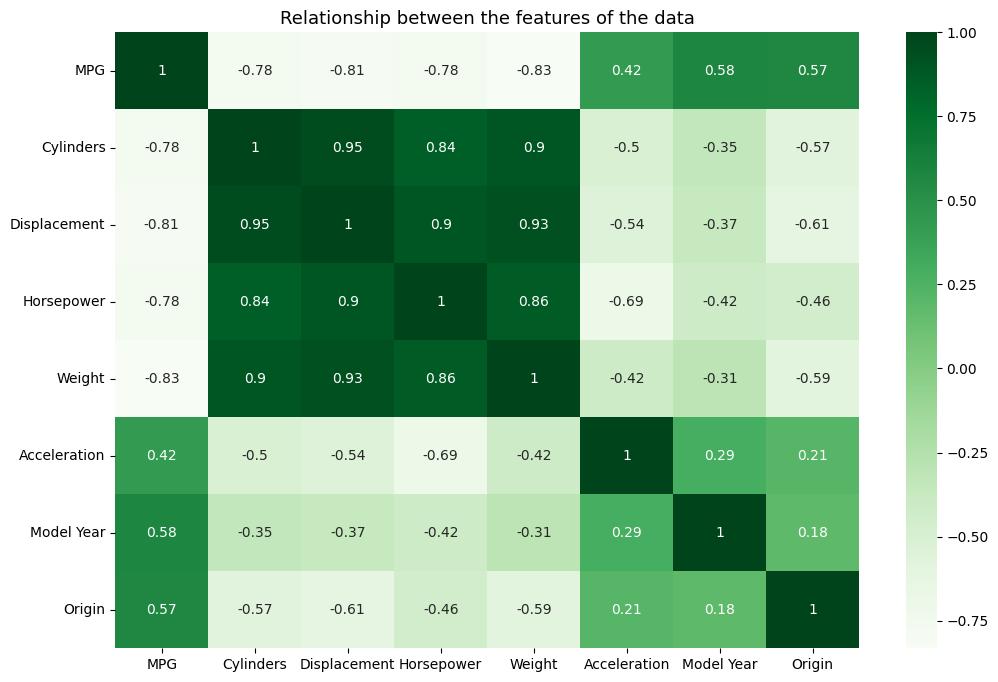

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap=plt.cm.Greens, annot=True)
plt.title('Relationship between the features of the data', fontsize=13)
plt.show()

Seaborn has an excellent function called `pairplot()` that produces a grid of plots so you can better visualize the correlation between features. The distributions for each feature are shown along the diagonal. The type of distributions we're using, in this case, is called `kde` for kernel density estimate. You can think of these plots as smoothed histograms based on the sample data.

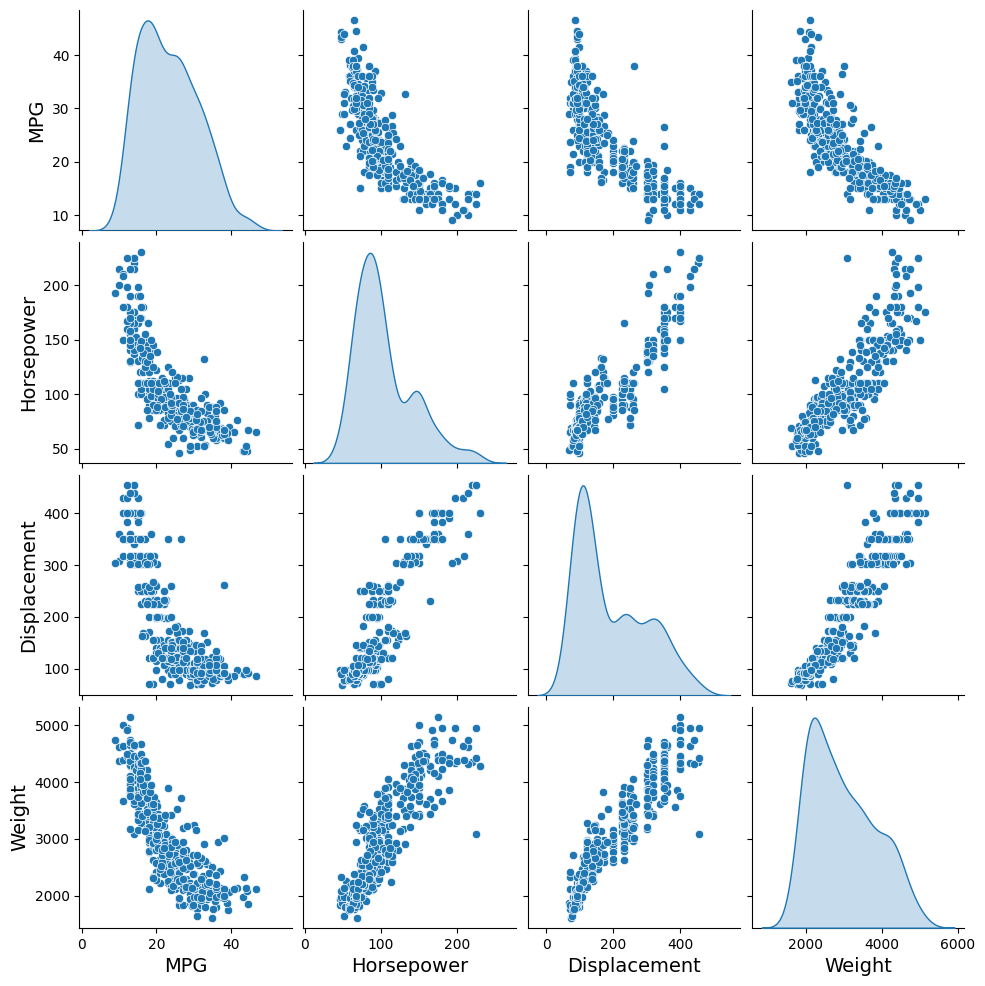

In [14]:
sns.pairplot(dataset[['MPG', 'Horsepower', 'Displacement', 'Weight']], diag_kind='kde');

## 4 Split the Dataset into Train and Test

Let's now split the dataset into test and train components which is required in order to properly train and test models.

In [15]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

print(train_dataset.shape)
print(test_dataset.shape)

train_dataset

(314, 8)
(78, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
79,26.0,4,96.0,69.0,2189.0,18.0,72,2
276,21.6,4,121.0,115.0,2795.0,15.7,78,2
248,36.1,4,91.0,60.0,1800.0,16.4,78,3
56,26.0,4,91.0,70.0,1955.0,20.5,71,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
...,...,...,...,...,...,...,...,...
218,36.0,4,79.0,58.0,1825.0,18.6,77,2
281,19.8,6,200.0,85.0,2990.0,18.2,79,1
342,30.0,4,135.0,84.0,2385.0,12.9,81,1
238,33.5,4,98.0,83.0,2075.0,15.9,77,1


## 5 Check Dataset Statistics

Let's take a look at the magnitude of the various features. As you can see from the table below, the various features have a wide range of values spanning three orders of magnitude. When the feature data varies so widley, it is generally advised to scale the feature data as a pre-processing step before training a model. Scaling of the input features will be discussed further below.

In [16]:
dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.445918,7.805007
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Origin,1.576531,0.805518


## 6 Split the Features from Target Values

Since the features and the target value are contained in the same dataframe we will separate them into two dataframes to keep them isolated. This also makes it easier to manage the data.

In [17]:
X_train = train_dataset.copy()
X_test  = test_dataset.copy()

# Separate target values from features.
y_train = X_train.pop('MPG')
y_test  = X_test.pop('MPG')

In [18]:
X_train_stats = X_train.describe().transpose()[['mean', 'std']]
X_train_stats

,mean,std
Cylinders,5.531847,1.729449
Displacement,197.855096,106.501896
Horsepower,105.971338,39.636557
Weight,3005.745223,859.060925
Acceleration,15.510828,2.803560
Model Year,75.910828,3.688989
Origin,1.579618,0.808322


## 7 Normalize the Feature Data
As mentioned above, this dataset contains a wide range of feature values, and it is often recommended to scale features so that they span a similar value range. One reason this is important is that the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs. Although a model might converge without feature scaling, scaling features makes training much more stable and also facilitates the optimization process by allowing gradient descent to converge much faster.

Various methods can be used to scale features, but normalization and standardization are the most commonly used methods. Normalization usually refers to min/max scaling, where each feature is scaled to the range \[0, 1\] as shown below for each feature ($x_i$):

$$ x_i = \frac{x_i - min_{x_i}}{max_{x_i} - min_{x_i}}$$


Standardization (also referred to as z-score scaling) assume the original data is normally distributed and scales the feature to have zero mean and a standard deviation of 1. This is accomplished for each feature ($x_i$) by subtracting the mean of the feature data from each data point (referred to as mean subtraction) and then dividing that result by the standard deviation for the feature data as shown below:

$$ x_i = \frac{x_i - \mu_i}{\sigma_i}$$

Thankfully, Keras now provides a normalization layer that automatically performs feature-wise normalization to the input features, so we don't need to write our own functions to manage this conversion. The normalization layer will shift and scale inputs into a distribution centred around 0 with a standard deviation of 1. The name of this layer is a little confusing since the feature scaling nomenclature described in the paragraph above is fairly well established. In Keras, normalization refers to z-score scaling of the feature data.

In the code cell below, we are using Keras to create a normalization layer for a single feature. We first convert the Horsepower feature in the dataframe to a NumPy array. We then create a normalizer object with an input shape of one since this is for a single feature. Then we use the normalizer object to call the `adapt()` method, which completes the implementation of the normalization layer. We then show that we can print out the parameters associated with this layer. In the next notebook, we will learn how to add a normalization layer to a network architecture which normalizes the input features prior to processing the date through the network.

**Note**: The normalization parameters (mean and standard deviation) are derived only from the **training** dataset, but will be applied to all of the data (train, validation and test).

In [19]:
# Convert the Horsepower feature in the dataframe to a NumPy array.
hp = np.array(X_train['Horsepower'])

# Create the normalization layer (for Horsepower).
hp_normalizer = layers.Normalization(input_shape=[1,], axis=None)

# Call the `adapt` method to apply the normalization.
hp_normalizer.adapt(hp)

print('Mean:  ', hp_normalizer.mean.numpy()[0])
print('Std:   ', math.sqrt(hp_normalizer.variance.numpy()[0]))
print('Count: ', hp_normalizer.count.numpy())

Mean:   105.97134
Std:    39.573391877959644
Count:  0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 8 Conclusion

In this notebook we introduced two python packages (Pandas and Seaborn) that are often used to manage and explore datasets. We also showed how to split the data into train and test components and also showed how to create a data normalization layer in Keras to pre-process the data prior to training. In the next notebook we will use this dataset to perform both linear and non-linear regression using Keras.